<a href="https://colab.research.google.com/github/RadhikaRM/Mobilepricerangeprediction/blob/main/Team_MobilePriceRangePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Description**
###  In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
###The objective is to find out some relation between features of a mobile phone  (eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

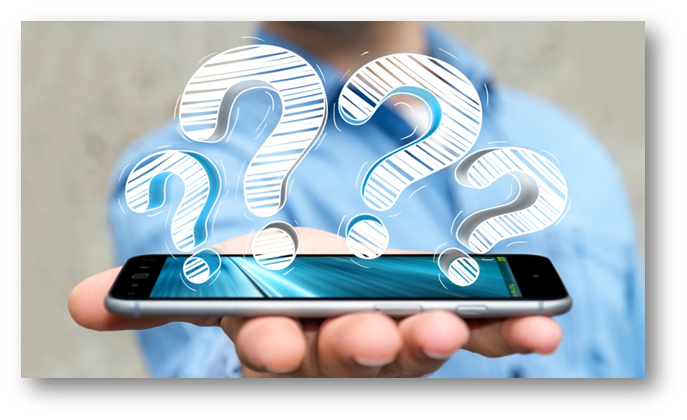

# **Data Description** -

---



### **Battery_power** - Total energy a battery can store in one time measured in mAh
### **Blue** - Has bluetooth or not
### **Clock_speed** - speed at which microprocessor executes instructions
### **Dual_sim** - Has dual sim support or not
### **Fc** - Front Camera mega pixels
### **Four_g** - Has 4G or not
### **Int_memory** - Internal Memory in Gigabytes
### **M_dep** - Mobile Depth in cm
### **Mobile_wt** - Weight of mobile phone
### **N_cores** - Number of cores of processor
### **Pc** - Primary Camera mega pixels
### **Px_height** - Pixel Resolution Height
### **Px_width** - Pixel Resolution Width
### **Ram** - Random Access Memory in Mega Bytes
### **Sc_h** - Screen Height of mobile in cm
### **Sc_w** - Screen Width of mobile in cm
### **Talk_time** - longest time that a single battery charge will last
### **Three_g** - Has 3G or not
### **Touch_screen** - Has touch screen or not
### **Wifi** - Has wifi or not
### **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# ***Importing the data***

In [ ]:
#importing the required modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform

In [ ]:
#Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the csv file
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Mobile_price_prediction/data_mobile_price_range.csv")
#/content/drive/MyDrive/Almabetter/Mobilepriceprediction/data_mobile_price_range.csv

In [ ]:
# 'pd.set_option' to show all the columns
pd.set_option("display.max_columns", None)
#displaying top 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#displaying bottom 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


# ***Data preparation and cleaning***

In [ ]:
df.shape # dataset shape

(2000, 21)

In [ ]:
#printing a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The dataset has 2000 rows and 21 columns.None of the columns contain null values

In [ ]:
#Checking for duplicates
df[df.duplicated()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


Dataset has no duplicates

In [ ]:
# Calculating  statistical data like percentile, mean and std of the numerical columns in the DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


px_height and sc_w have minimum values equal to 0. This seems weird.

In [ ]:
#Displaying the count of rows with incorrect values
print(len(df[df['sc_w']<=0.0]))
print(len(df[df['px_height']<=0.0]))

180
2


In [ ]:
# Data preparation
# replacing sc_w values equal to zero with it's median. # litte feature engineering
df['sc_w'].replace(0, df['sc_w'].median(), inplace=True)
# replacing px_height values equal to zero with it's median.
df['px_height'].replace(0, df['px_height'].median(), inplace=True)

In [ ]:
len(df[df['sc_h']<=0.0]) # screen height has no less than 0 or equal to 0

0

In [ ]:
# target values
df['price_range'].value_counts() # well balanced dataset

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

There is no imbalance of classes in the dataset 

# **Univariate Analysis**

In [ ]:
#creating list of numerical and categorical columns
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
encoded_cat_columns=list(set(df.columns)-set(numerical_columns))

In [ ]:
#printing the list of numerical columns in the dataframe
print(numerical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [ ]:
#printing the list of encoded categorical columns in the dataframe
print(encoded_cat_columns)

['blue', 'touch_screen', 'price_range', 'four_g', 'three_g', 'wifi', 'dual_sim']


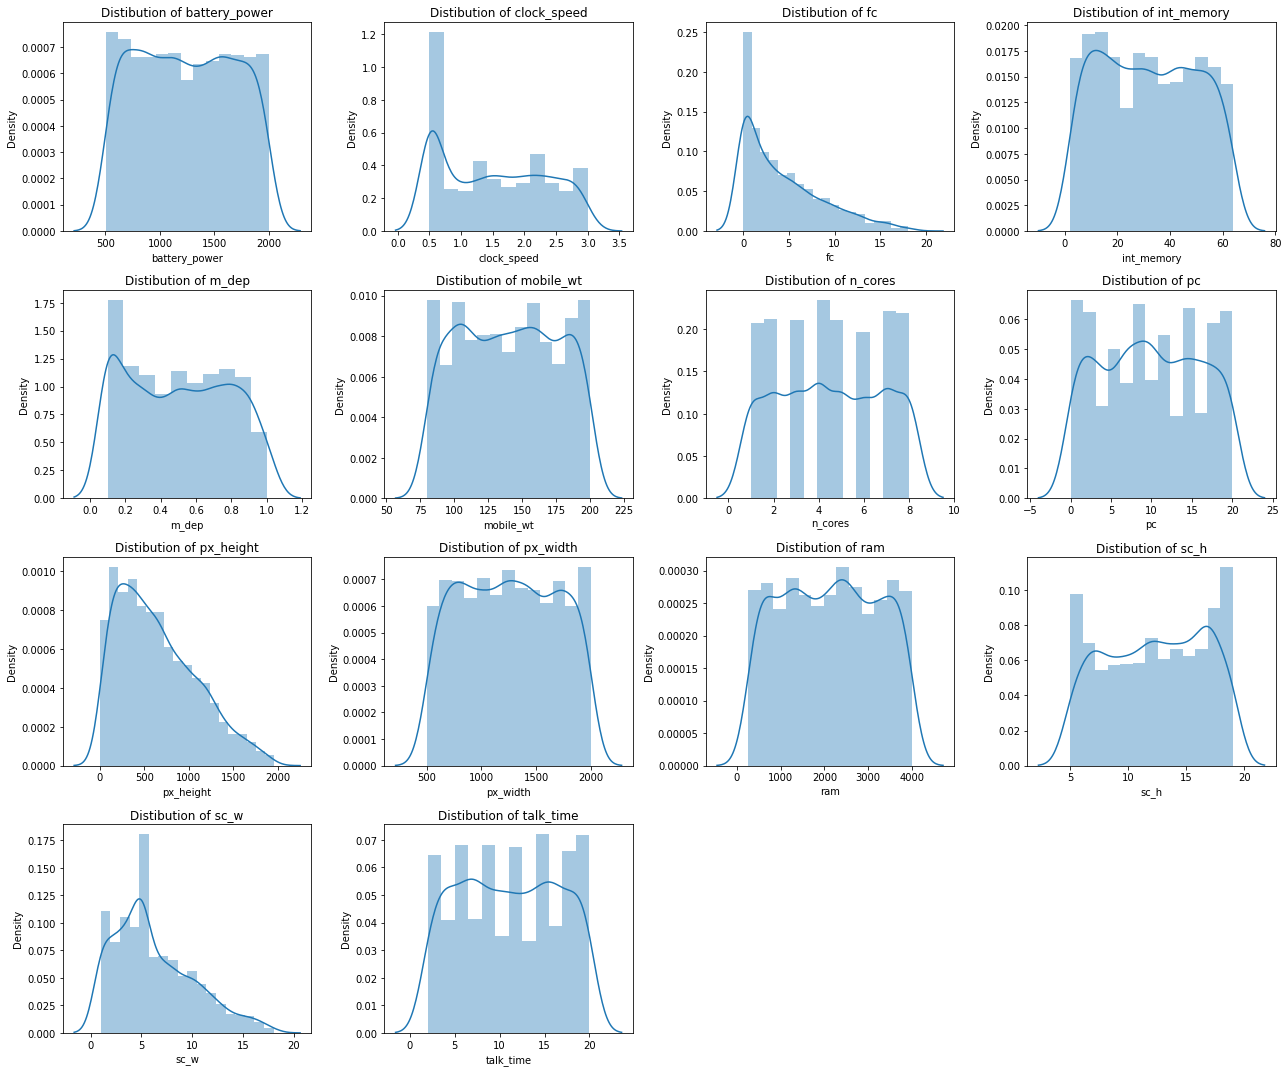

In [ ]:
#Displaying the distribution plots of numerical columns
fig = plt.figure(figsize=(18,15))
c=1
for i in numerical_columns:
  plt.subplot(4,4, c)
  sns.distplot(df[i],kde=True)
  plt.title('Distibution of {}'.format(i))
  c+=1
plt.tight_layout()  

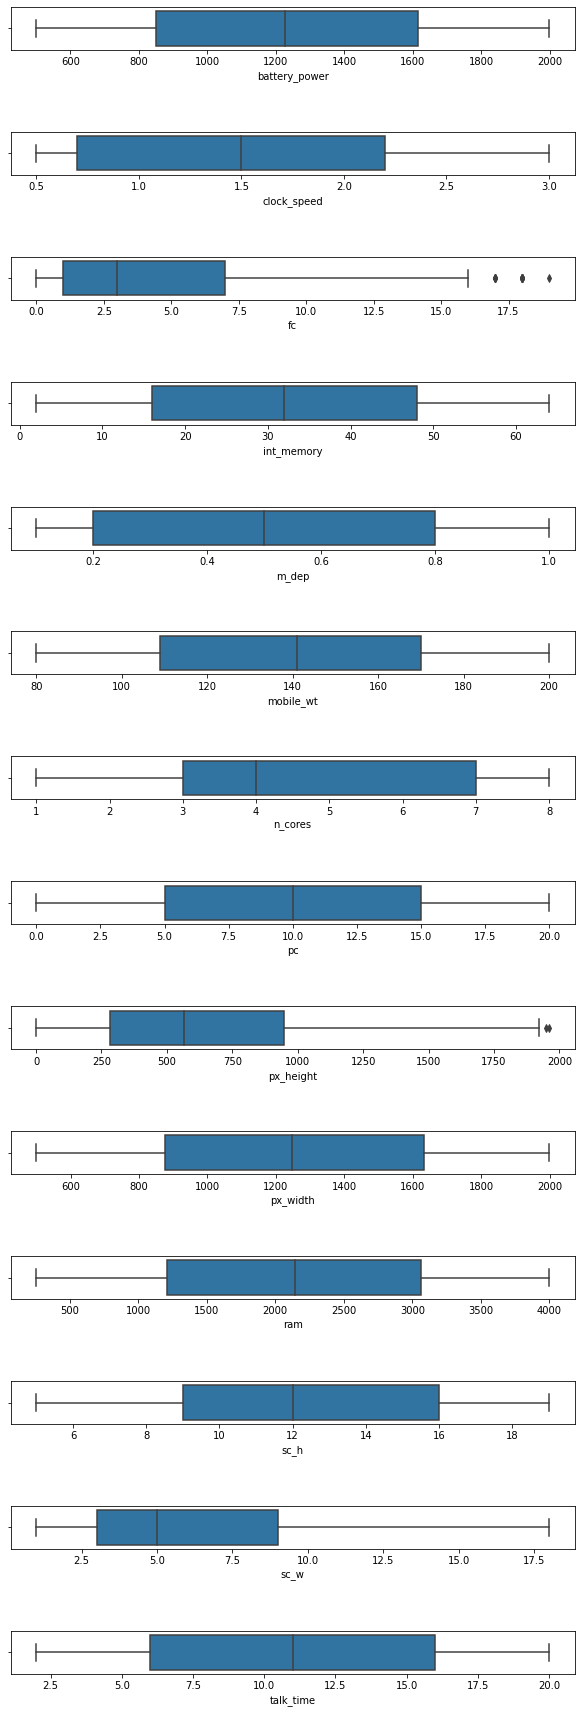

In [ ]:
#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in numerical_columns :
    plt.subplot(15,1, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df)
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Data does not contain extreme outliers


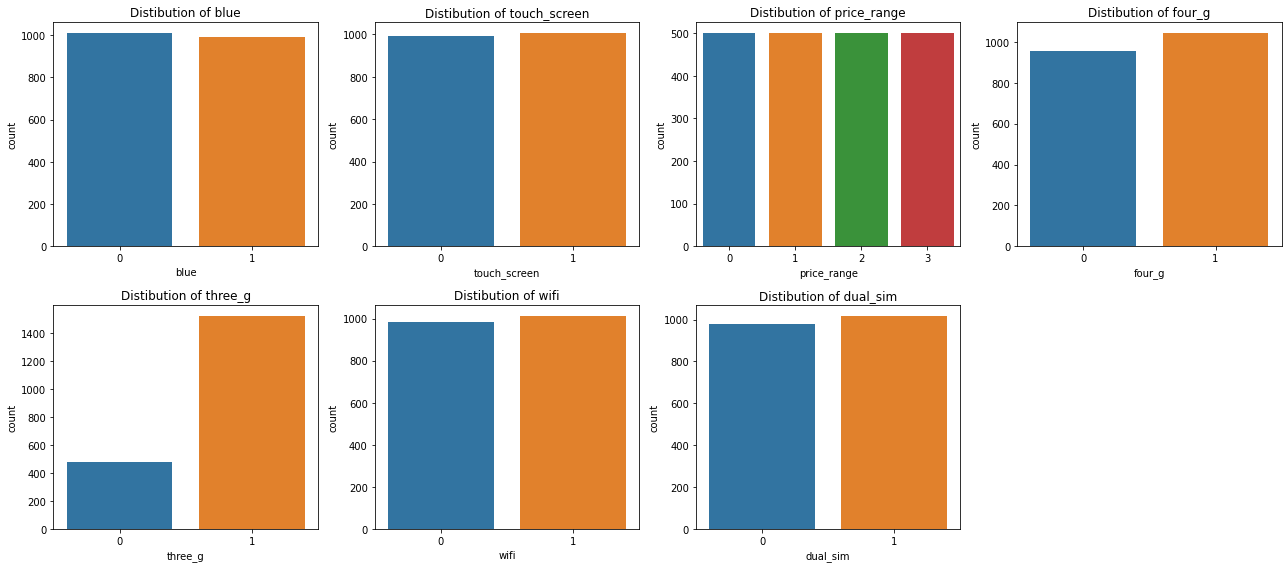

In [ ]:
#Count plot of categorical columns

fig = plt.figure(figsize=(18,8))
c=1
for i in encoded_cat_columns:
  plt.subplot(2,4, c)
  sns.countplot(df[i])
  plt.title('Distibution of {}'.format(i))
  c+=1
plt.tight_layout()  

### Conclusions from univariate analysis

* Most of the phones currently available in the market  have 3G support
* There is a similar count of records for phones belonging to all price ranges in the given data.
- Most of the phones do not contain front camera or having low quality cameras

# **Bivariate Analysis**

Target vs other features

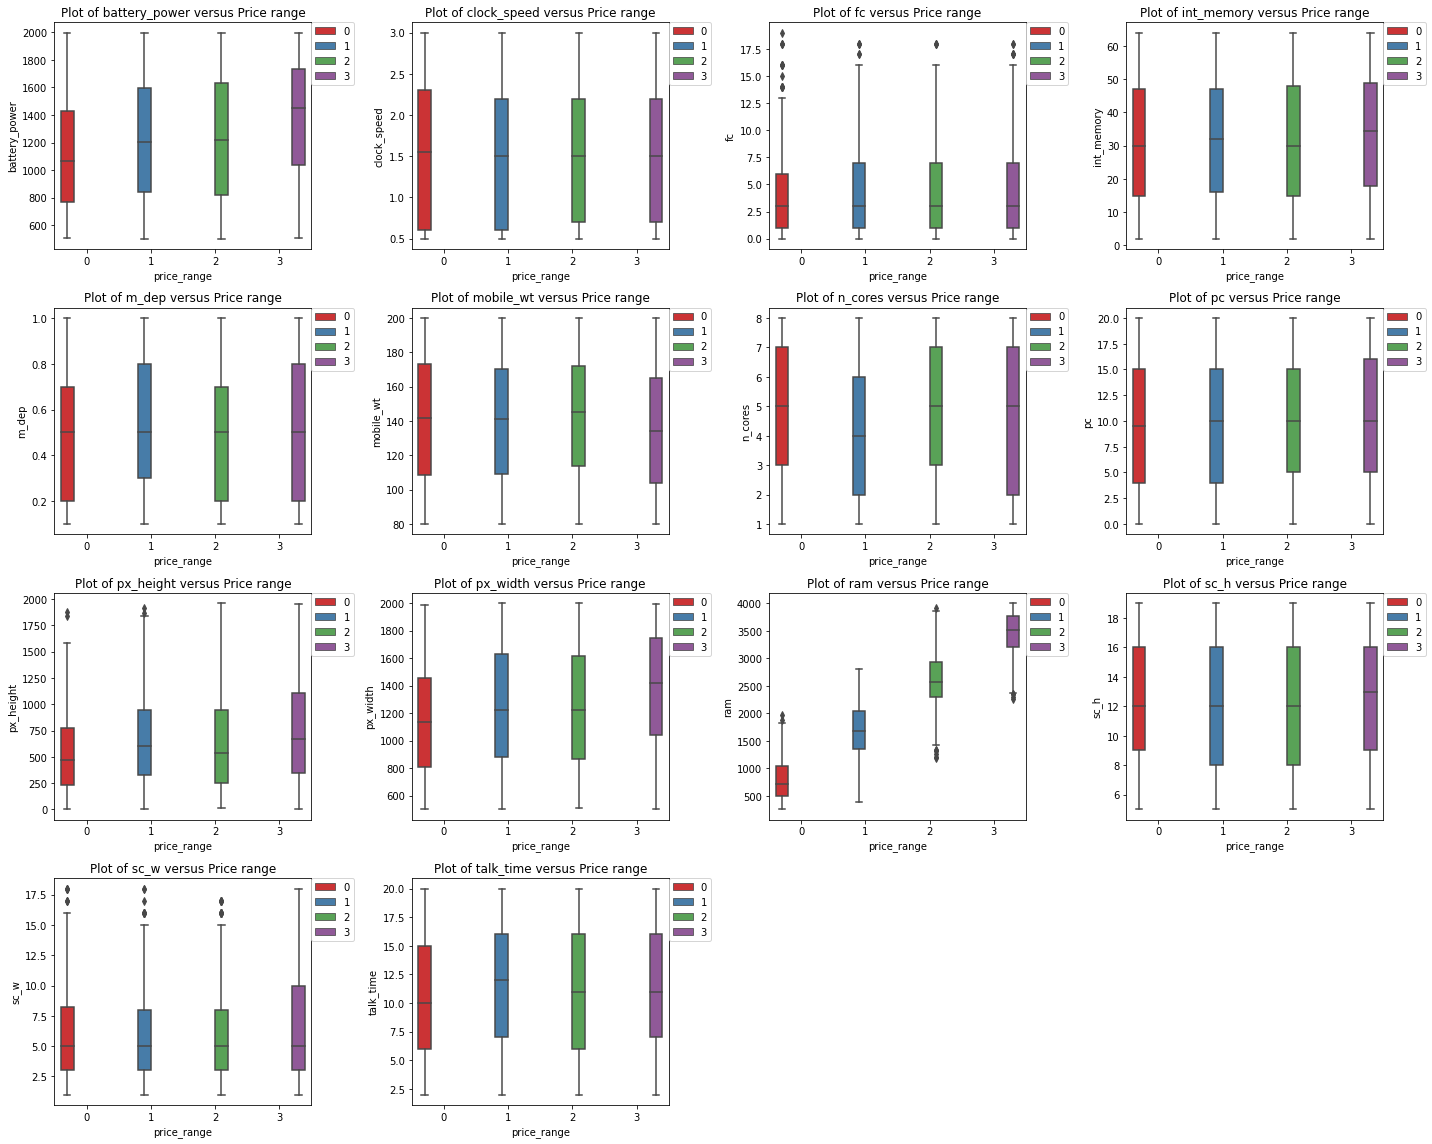

In [ ]:
#Box plot of price range and independent numerical columns
fig = plt.figure(figsize=(20,16))
c=1
for i in numerical_columns :
    plt.subplot(4,4, c)
    sns.boxplot(x='price_range',y=i,data=df,hue='price_range',palette='Set1')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Plot of {i} versus Price range')
    c = c + 1
plt.tight_layout()

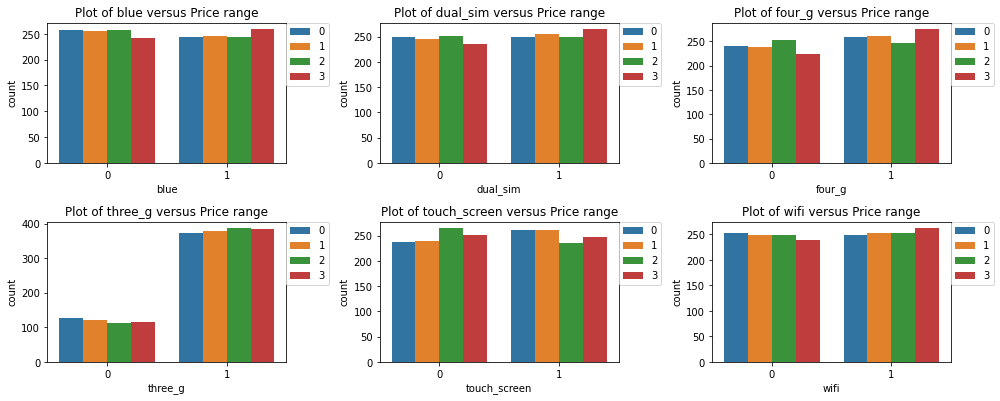

In [ ]:
#count plot of price range vs categorical columns
fig = plt.figure(figsize=(14,8))
c=1
for i in ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'] :
    plt.subplot(3,3, c)
    sns.countplot(x=i,data=df,hue='price_range')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Plot of {i} versus Price range')
    c = c + 1
plt.tight_layout()

#**Multivariate Analysis**

Text(0, 0.5, 'Number of phones')

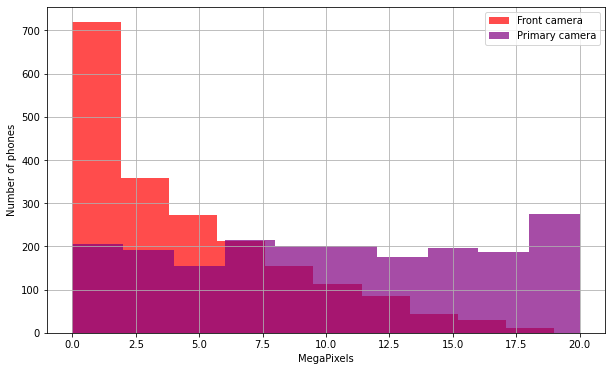

In [ ]:
#Histogram of Number of phones and pixel quality of front camera and primary camera
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.7,color='Red',label='Front camera')
df['pc'].hist(alpha=0.7,color='Purple',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')
plt.ylabel('Number of phones')

*  Front cameras present in majority of phones have poor quality(below 2.5 MP)

### Conclusions:


*   Relatively expensive phones have higher capacity batteries.
*  Most expensive (category 3) phones have better cameras.
*   Relatively expensive phones have much bigger rams.
*   Expensive phones have better screen quality.
*   Most expensive phones have wider screens.
*   Most expensive phones are lighter than the competition



# **Feature Selection**



##  ***Checking Multicollinearity*** 

In [71]:
# making a copy of our dataset
df_1 = df.copy()

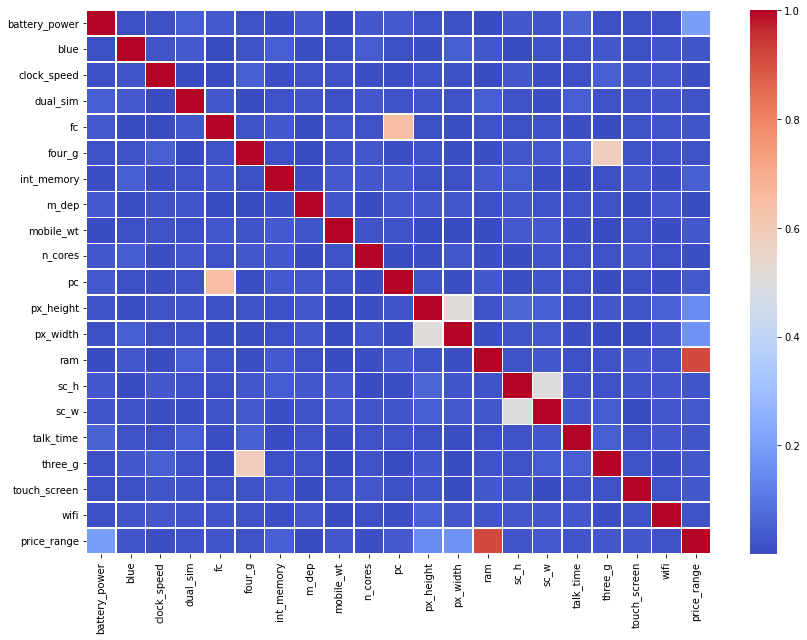

In [72]:
# heatmap for checking multi-collinearity
plt.figure(figsize=[14,10])
sns.heatmap(data=abs(df_1.corr()), annot=False, cmap='coolwarm', linewidths=0.5)

In [73]:
# calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def check_vif(dataframe):
  # the independent variables set
  X = dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)

In [74]:

check_vif(df_1.iloc[:,:-1])

          feature        VIF
0   battery_power   8.073908
1            blue   1.982736
2     clock_speed   4.261359
3        dual_sim   2.014356
4              fc   3.412883
5          four_g   3.193731
6      int_memory   3.960540
7           m_dep   3.910499
8       mobile_wt  12.969326
9         n_cores   4.647420
10             pc   6.222849
11      px_height   4.280154
12       px_width  11.792757
13            ram   4.688630
14           sc_h  11.675539
15           sc_w   4.650102
16      talk_time   4.857407
17        three_g   6.195323
18   touch_screen   1.988861
19           wifi   2.020265


## ***SelectKBest***

In [75]:
# seperating data into independent and dependent variables
X = df_1.drop(['price_range'],axis=1)
y = df_1['price_range']

In [76]:
#implementing KBest feature selection method
from sklearn.feature_selection import SelectKBest,chi2
best_features = SelectKBest(chi2,k=15)
kbest= best_features.fit(X,y)
scores = pd.DataFrame(kbest.scores_)
features = pd.DataFrame(X.columns)

# concat both dataframes for comparing best scores
score_list = pd.concat([features,scores],axis=1)
score_list.columns = ["features","scores"]
score_list

,features,scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [77]:
#Top 12 Features with highest scores
new=score_list.nlargest(12,"scores")
print(new)

         features         scores
13            ram  931267.519053
11      px_height   17561.692129
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
16      talk_time      13.236400
15           sc_w      10.764356
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556


In [78]:
#Creating a dataframe for the selected independent features
X = df_1[list(new['features'])]
X

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,talk_time,sc_w,fc,sc_h,pc,n_cores
0,2549,20,842,756,188,7,19,7,1,9,2,2
1,2631,905,1021,1988,136,53,7,3,0,17,6,3
2,2603,1263,563,1716,145,41,9,2,2,11,6,5
3,2769,1216,615,1786,131,10,11,8,0,16,9,6
4,1411,1208,1821,1212,141,44,15,2,13,8,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,19,4,0,13,14,6
1996,2032,915,1965,1965,187,39,16,10,0,11,3,4
1997,3057,868,1911,1632,108,36,5,1,1,9,3,8
1998,869,336,1512,670,145,46,19,10,4,18,5,5


##**Performing train-test split**


In [79]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  

## **Feature Scaling**

In [80]:
# scaling the variables using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
print(X_train.shape)
print(X_test.shape)

(1500, 12)
(500, 12)


## **Model implementations**





In [82]:
# models list for dataframe of models
models_list = []

In [83]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,recall_score,precision_score,f1_score,roc_auc_score

In [84]:
def evaluate_model(name,X_test,y_true,y_pred):

  '''
  This function calculate  metrics for evaluating 
  the perfomance of Regression models
  '''
  list_of_scores=[]
  #Accuracy 
  Accuracy =  accuracy_score(y_true,y_pred)
  print(f'Accuracy : {Accuracy}')
    
  #Recall
  Recall  = recall_score(y_true,y_pred,average='weighted')
  print("Recall :" , {Recall})

  #precision
  Precision = precision_score(y_true,y_pred,average='weighted')
  print("Precision :" ,{Precision})
 
  #f1 score
  F1 = f1_score(y_true,y_pred,average='weighted')
  print("F1 :" ,{F1})

  #finding the adjusted r2 score
  # Auc=roc_auc_score(y_true,y_pred,average='weighted',multi_class='ovr')
  # print("Adjusted R2 : ",{Auc})

  list_of_scores.extend([name,Accuracy,Recall,Precision,F1])
  return(list_of_scores)

In [85]:
def classification_performance(y_,y_pred):
  '''
  prints the confusion matrix,classification report and accuracy score of the model

  '''
  from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
  #accuracy
  print("Accuracy score is {}".format(accuracy_score(y_, y_pred)))

  #confusion matrix and classification report for the test/train set
  print("-"*60)
  print('Classification report')
  print(classification_report(y_, y_pred,digits=3))

  print("Confusion matrix")
  labels = ['Low', 'Medium','High','Premium']
  cm = confusion_matrix(y_, y_pred)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  print("-"*60)

In [86]:
# implementing baseline model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [87]:
print(clf.coef_)
print('-'*50)
print(clf.intercept_)

[[-1.38318256e+01 -2.41555889e+00 -3.45877661e+00 -2.04641670e+00
   3.22891036e-01 -2.87980664e-01 -1.36563406e-01  9.23560700e-02
  -1.48263087e-01  9.58315053e-03  3.49027786e-02  4.69625247e-02]
 [-3.85017846e+00 -4.74023859e-01 -7.93492754e-01 -6.06907497e-01
   1.36969386e-01 -7.65070921e-02  7.98769797e-02 -1.96043067e-01
   1.64435166e-02 -2.54719922e-02  4.38552086e-03 -4.31447911e-01]
 [ 4.11710120e+00  5.76910234e-01  8.46445639e-01  5.43029073e-01
   2.33855708e-01 -1.44542275e-01 -4.46695420e-02  1.01315780e-01
   1.41655489e-01 -2.01620191e-01 -7.50810308e-04  1.89263439e-01]
 [ 1.35649029e+01  2.31267252e+00  3.40582373e+00  2.11029513e+00
  -6.93716130e-01  5.09030031e-01  1.01355969e-01  2.37121776e-03
  -9.83591824e-03  2.17509033e-01 -3.85374891e-02  1.95221948e-01]]
--------------------------------------------------
[  9.2247635    4.16677047  -1.86594472 -11.52558925]


In [88]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

##Evaluating the model
models_list.append(evaluate_model('Logistic (Baseline)',X_test,y_test,test_class_preds))

Accuracy : 0.938
Recall : {0.938}
Precision : {0.937536838895765}
F1 : {0.9374903827303788}


In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9453333333333334
The accuracy on test data is  0.938


[[370   6   0   0]
 [ 18 355  17   0]
 [  0  22 339  14]
 [  0   0   5 354]]


[Text(0, 0.5, 'Low'),
 Text(0, 1.5, 'Medium'),
 Text(0, 2.5, 'High'),
 Text(0, 3.5, 'Premium')]

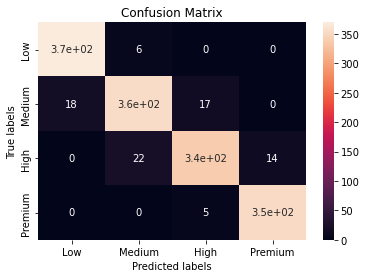

In [90]:
# Get the confusion matrix for both train and test

labels = ['Low', 'Medium','High','Premium']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [91]:
#implementing Repeated Stratified k-fold grid search cross validation 
logistic = LogisticRegression()
scoring = ['accuracy']
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(logistic, space, scoring='accuracy', n_jobs=-1, cv=cv)

In [92]:
# executing search
clf_best = search.fit(X_train, y_train)

In [93]:
y_pred_testing = clf_best.predict(X_test)

Accuracy score is 0.968
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.976     0.984     0.980       124
           1      0.938     0.964     0.951       110
           2      0.967     0.944     0.955       125
           3      0.986     0.979     0.982       141

    accuracy                          0.968       500
   macro avg      0.967     0.968     0.967       500
weighted avg      0.968     0.968     0.968       500

Confusion matrix
------------------------------------------------------------


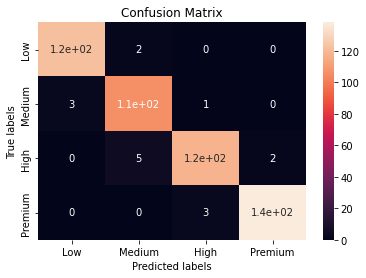

In [94]:
# Accuracy score,confusion matrix and classification report for test set
classification_performance(y_test,y_pred_testing)

In [95]:
# Evaluating the model
models_list.append(evaluate_model('Logistic (Tuned)',X_test,y_test,y_pred_testing))

Accuracy : 0.968
Recall : {0.968}
Precision : {0.9681943886758823}
F1 : {0.9680166655508928}


## KNN Classifier

In [96]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier( )  
knn.fit(X_train, y_train)  

KNeighborsClassifier()

In [97]:
# prediction for training set
y_pred_train = knn.predict(X_train)
# prediction for testing set
y_pred_test =knn.predict(X_test)


Accuracy score is 0.7486666666666667
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.797     0.867     0.831       376
           1      0.622     0.687     0.653       390
           2      0.702     0.659     0.680       375
           3      0.916     0.786     0.846       359

    accuracy                          0.749      1500
   macro avg      0.759     0.750     0.752      1500
weighted avg      0.756     0.749     0.750      1500

Confusion matrix
------------------------------------------------------------


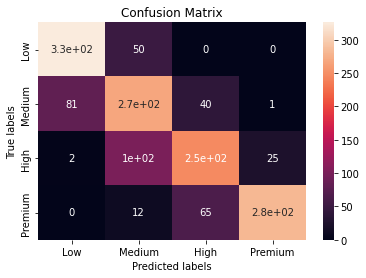

In [98]:
# Accuracy score,confusion matrix and classification report for training set
classification_performance(y_train,y_pred_train)

Accuracy score is 0.614
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.748     0.766     0.757       124
           1      0.394     0.473     0.430       110
           2      0.473     0.496     0.484       125
           3      0.891     0.695     0.781       141

    accuracy                          0.614       500
   macro avg      0.627     0.607     0.613       500
weighted avg      0.642     0.614     0.624       500

Confusion matrix
------------------------------------------------------------


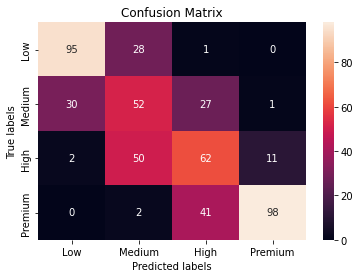

In [99]:
# Accuracy score,confusion matrix and classification report for testing set
classification_performance(y_test,y_pred_test)

In [100]:
#Evaluating the model on the test set
models_list.append(evaluate_model('KNN (Baseline)',X_test,y_test,y_pred_test))

Accuracy : 0.614
Recall : {0.614}
Precision : {0.6417354520136752}
F1 : {0.6235754595255342}


# Hyper-parameter tuning KNN

In [101]:
#Hyperparameter tuning with GridSearchCV for knn
knn = KNeighborsClassifier(algorithm='auto')
parameters_grid = { 'n_neighbors': list(range(1,50)),'leaf_size': list(range(20,50)),'p': (1,2),'weights': ('uniform', 'distance')} 
                
# Performing 3-fold Grid Search Cross-validation on the knn model
knn_cv = GridSearchCV(estimator=knn,param_grid=parameters_grid,scoring = 'accuracy',n_jobs = -1,cv = 3)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                       30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                                       40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': (1, 2), 'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [102]:
print(f'The optimal value for hyperparameters are : {knn_cv.best_params_} \n')

The optimal value for hyperparameters are : {'leaf_size': 20, 'n_neighbors': 48, 'p': 1, 'weights': 'distance'} 



In [103]:
# fitting best parameters
best_knn=knn_cv.best_estimator_
best_knn.fit(X_train, y_train) 

# prediction for training set
y_pred_train = best_knn.predict(X_train)

# prediction fot testing set
y_pred =best_knn.predict(X_test)

Evaluating the performance on Test data
Accuracy score is 0.79
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.875     0.903     0.889       124
           1      0.664     0.645     0.654       110
           2      0.664     0.776     0.716       125
           3      0.966     0.816     0.885       141

    accuracy                          0.790       500
   macro avg      0.792     0.785     0.786       500
weighted avg      0.802     0.790     0.793       500

Confusion matrix
------------------------------------------------------------


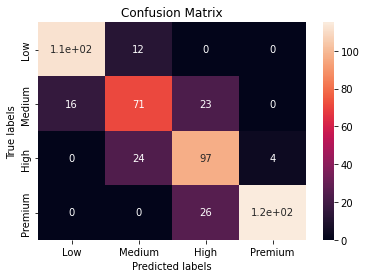

In [104]:
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred)

In [105]:
#Evaluating the model
models_list.append(evaluate_model('KNN (Tuned)',X_test,y_test,y_pred))

Accuracy : 0.79
Recall : {0.79}
Precision : {0.8015982072255351}
F1 : {0.7928359062144326}


# SVM 


In [106]:
from pandas.core.common import random_state
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=2)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=2)

In [107]:
# prediction for training set
y_pred_train = classifier.predict(X_train)
# prediction for testing set
y_pred = classifier.predict(X_test)

- Metrics

Evaluating the performance on Train data
Accuracy score is 0.9686666666666667
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.984     0.984     0.984       376
           1      0.950     0.977     0.963       390
           2      0.967     0.939     0.953       375
           3      0.975     0.975     0.975       359

    accuracy                          0.969      1500
   macro avg      0.969     0.969     0.969      1500
weighted avg      0.969     0.969     0.969      1500

Confusion matrix
------------------------------------------------------------


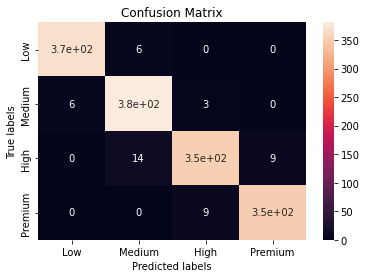

In [108]:

# Accuracy score,confusion matrix and classification report for training set
print('Evaluating the performance on Train data')
classification_performance(y_train,y_pred_train)

Evaluating the performance on Test data
Accuracy score is 0.948
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.968     0.968     0.968       124
           1      0.904     0.936     0.920       110
           2      0.935     0.920     0.927       125
           3      0.978     0.965     0.971       141

    accuracy                          0.948       500
   macro avg      0.946     0.947     0.947       500
weighted avg      0.948     0.948     0.948       500

Confusion matrix
------------------------------------------------------------


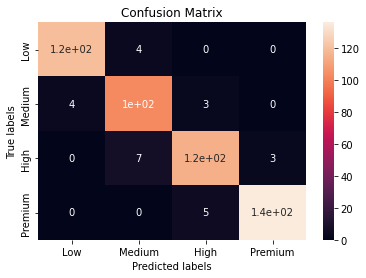

In [109]:

# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred)

In [110]:
#Evaluating the model
models_list.append(evaluate_model('SVM (Baseline)',X_test,y_test,y_pred))

Accuracy : 0.948
Recall : {0.948}
Precision : {0.9484254362876836}
F1 : {0.9481191244239631}


## SVM - Hyper parameter tuning

In [111]:
parameters = {'C':[0.1, 1, 10, 100],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'degree':[1,2,3,4,5,6],
              'gamma':[0.0001, 0.001, 0.01, 0.1, 1]}

gridsearch_model = GridSearchCV(SVC(), parameters, cv=3)
gridsearch_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [112]:
print(gridsearch_model.best_params_)
print(gridsearch_model.best_score_)

{'C': 100, 'degree': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.9713333333333333


In [113]:
# accuracy for train and test set
y_grid_train = gridsearch_model.predict(X_train)
y_grid_pred = gridsearch_model.predict(X_test)

print("Accuracy on train set: {}".format(accuracy_score(y_train, y_grid_train)))
print('Accuracy on test set: {}'.format(accuracy_score(y_test, y_grid_pred)))

Accuracy on train set: 0.984
Accuracy on test set: 0.968


Evaluating the performance on Train data
Accuracy score is 0.984
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.995     0.995     0.995       376
           1      0.979     0.979     0.979       390
           2      0.978     0.968     0.973       375
           3      0.983     0.994     0.989       359

    accuracy                          0.984      1500
   macro avg      0.984     0.984     0.984      1500
weighted avg      0.984     0.984     0.984      1500

Confusion matrix
------------------------------------------------------------
Evaluating the performance on Test data
Accuracy score is 0.968
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.984     0.992     0.988       124
           1      0.938     0.964     0.951       110
           2      0.959     0

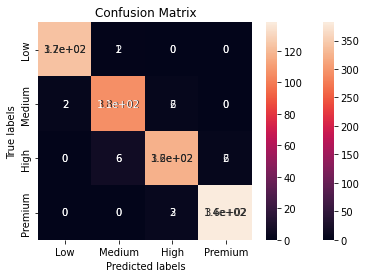

In [114]:
# Accuracy score,confusion matrix and classification report for training set
print('Evaluating the performance on Train data')
classification_performance(y_train,y_grid_train)
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_grid_pred)

In [115]:
models_list.append(evaluate_model('SVM (Tuned)',X_test,y_test,y_grid_pred))

Accuracy : 0.968
Recall : {0.968}
Precision : {0.9681292083480134}
F1 : {0.9679843419244032}


# Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

classifier_2 = GaussianNB()
classifier_2.fit(X_train, y_train)

# prediction fot training and test set
y_train_pred_gnb = classifier_2.predict(X_train)
y_pred_gnb = classifier_2.predict(X_test)

#accuracy
print("Accuracy for training set is {}".format(accuracy_score(y_train, y_train_pred_gnb)))
print("Accuracy for testing set is {}".format(accuracy_score(y_test, y_pred_gnb)))

Accuracy for training set is 0.8146666666666667
Accuracy for testing set is 0.834


AxesSubplot(0.125,0.125;0.62x0.755)


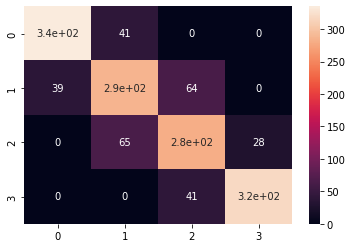

In [117]:
# confusion matrix for train
print(sns.heatmap(confusion_matrix(y_train, y_train_pred_gnb), annot=True))

AxesSubplot(0.125,0.125;0.62x0.755)


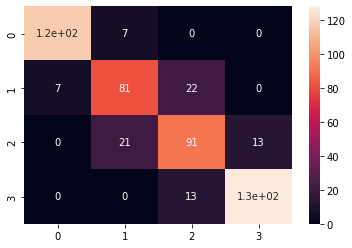

In [118]:
# confusion matrix for test
print(sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True))

In [119]:
# classification report
print(classification_report(y_train, y_train_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       376
           1       0.73      0.74      0.73       390
           2       0.73      0.75      0.74       375
           3       0.92      0.89      0.90       359

    accuracy                           0.81      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.81      0.82      1500

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       124
           1       0.74      0.74      0.74       110
           2       0.72      0.73      0.73       125
           3       0.91      0.91      0.91       141

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



# Random Forest Classifier

In [120]:
#Fitting the RF Classifier with default parameters to the training set  
from sklearn.ensemble import RandomForestClassifier  
rfc= RandomForestClassifier( )  
rfc.fit(X_train, y_train) 

RandomForestClassifier()

Evaluating the performance on Test data
Accuracy score is 0.89
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.953     0.992     0.972       124
           1      0.855     0.855     0.855       110
           2      0.818     0.792     0.805       125
           3      0.921     0.915     0.918       141

    accuracy                          0.890       500
   macro avg      0.887     0.888     0.887       500
weighted avg      0.889     0.890     0.889       500

Confusion matrix
------------------------------------------------------------


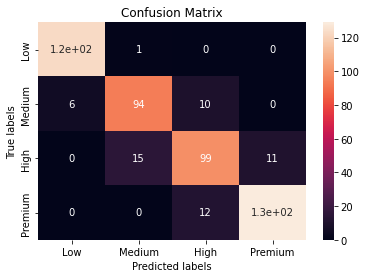

In [121]:
#Predicting the test set result  
y_pred_test= rfc.predict(X_test)  
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred_test)

In [122]:
#Evaluating the model
models_list.append(evaluate_model('Random Forest (Baseline)',X_test,y_test,y_pred_test))

Accuracy : 0.89
Recall : {0.89}
Precision : {0.8888534279673815}
F1 : {0.8892760015822628}


## RF - Hyper parameter tuning

In [123]:
#Performing Grid Search Cross validation to find the best parameters 
rfr=RandomForestClassifier( )  
parameters_grid={'n_estimators' :[100, 300, 500],
                 'max_depth' : [5, 8, 15, 25, 30],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf': [1, 2, 5, 10]}
rfr_cv = GridSearchCV(rfr, param_grid=parameters_grid, cv = 3, verbose = 1, n_jobs = -1,scoring='accuracy')
rfr_cv.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=1)

In [124]:
print(rfr_cv.best_params_)
print(rfr_cv.best_score_)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.8866666666666667


Evaluating the performance on Test data
Accuracy score is 0.898
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.953     0.984     0.968       124
           1      0.855     0.855     0.855       110
           2      0.842     0.808     0.824       125
           3      0.930     0.936     0.933       141

    accuracy                          0.898       500
   macro avg      0.895     0.896     0.895       500
weighted avg      0.897     0.898     0.897       500

Confusion matrix
------------------------------------------------------------


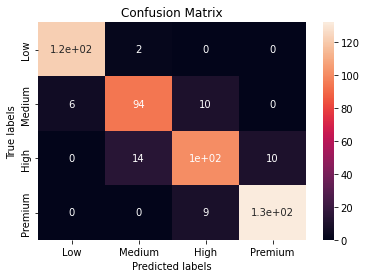

In [125]:
# implementing using best parameters
best_rfr=rfr_cv.best_estimator_
best_rfr.fit(X_train, y_train)  

# prediction for training set
y_pred_train = best_rfr.predict(X_train)
# prediction fot testing set
y_pred_test =best_rfr.predict(X_test)

# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred_test)

In [126]:
#Evaluating the model
models_list.append(evaluate_model('Random Forest (Tuned)',X_test,y_test,y_pred_test))

Accuracy : 0.898
Recall : {0.898}
Precision : {0.8969325117370892}
F1 : {0.8973165709157631}


# XGBoost

Evaluating the performance on Test data
Accuracy score is 0.906
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.952     0.968     0.960       124
           1      0.855     0.855     0.855       110
           2      0.855     0.848     0.851       125
           3      0.950     0.943     0.947       141

    accuracy                          0.906       500
   macro avg      0.903     0.903     0.903       500
weighted avg      0.906     0.906     0.906       500

Confusion matrix
------------------------------------------------------------


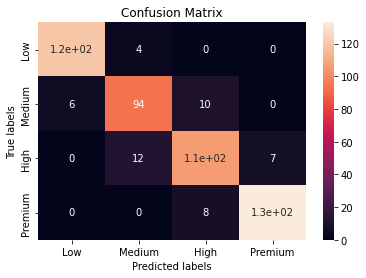

In [127]:
# Baseline XGB
import xgboost as xgb
xg_cls = xgb.XGBClassifier()
xg_cls.fit(X_train,y_train)

y_pred = xg_cls.predict(X_test)

# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred)

In [128]:
#Evaluating the model
models_list.append(evaluate_model('XGBoost (Baseline)',X_test,y_test,y_pred))

Accuracy : 0.906
Recall : {0.906}
Precision : {0.905800153609831}
F1 : {0.9058780248395717}


#### XGBoost - Hyper-tuning

In [129]:
from xgboost.sklearn import XGBClassifier
xgb_2 = XGBClassifier() 
parameters = {#'nthread':[4], #when use hyperthread, xgboost may become slower # supressing this HP,as this makes thing slower
              'objective':['multi:softmax'],
              'learning_rate': [0.01,.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [250,500,750,1000]}

xgb_grid = GridSearchCV(xgb_2,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.9006666666666667
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 750, 'objective': 'multi:softmax', 'silent': 1, 'subsample': 0.7}


Evaluating the performance on Test data
Accuracy score is 0.928
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.961     0.992     0.976       124
           1      0.925     0.900     0.912       110
           2      0.893     0.864     0.878       125
           3      0.931     0.950     0.940       141

    accuracy                          0.928       500
   macro avg      0.927     0.927     0.927       500
weighted avg      0.927     0.928     0.928       500

Confusion matrix
------------------------------------------------------------


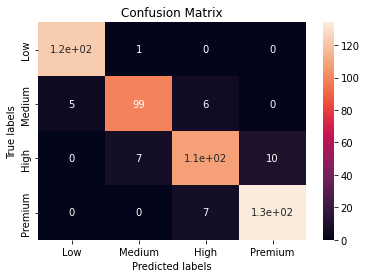

In [135]:
import xgboost as xgb
#Training data to the model with tuned parameters
xg_clf = xgb.XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.07, max_depth= 5,
                           min_child_weight=4, n_estimators= 750, objective='multi:softmax', silent=1, subsample=0.7)
xg_clf.fit(X_train,y_train)
#Making predictions from XGB model with tuned parameters
y_pred = xg_clf.predict(X_test)

# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred)

In [137]:
#Evaluating the model
models_list.append(evaluate_model('XGBoost (Tuned)',X_test,y_test,y_pred))

Accuracy : 0.928
Recall : {0.928}
Precision : {0.9274210644035943}
F1 : {0.9275237077745505}


In [139]:
#Comparing models
models_stats=pd.DataFrame(models_list,columns=['Classification Model','Accuracy','Recall','Precsion','F1-score'])
models_stats

,Classification Model,Accuracy,Recall,Precsion,F1-score
0,Logistic (Baseline),0.938,0.938,0.937537,0.937490
1,Logistic (Tuned),0.968,0.968,0.968194,0.968017
2,KNN (Baseline),0.614,0.614,0.641735,0.623575
3,KNN (Tuned),0.790,0.790,0.801598,0.792836
4,SVM (Baseline),0.948,0.948,0.948425,0.948119
5,SVM (Tuned),0.968,0.968,0.968129,0.967984
6,Random Forest (Baseline),0.890,0.890,0.888853,0.889276
7,Random Forest (Tuned),0.898,0.898,0.896933,0.897317
8,XGBoost (Baseline),0.906,0.906,0.905800,0.905878
9,XGBoost (Tuned),0.928,0.928,0.927421,0.927524


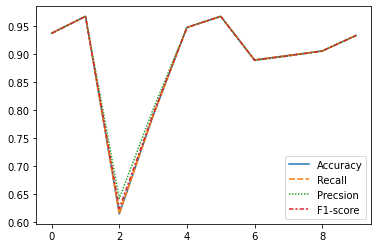

In [134]:
sns.lineplot(data=models_stats)

# Conclusions